In this scenario, we will be starting with a simple compartmental model, calibrating parameters and
comparing with historical data, and progressively adding complexity to the model, to see how the fit
improves. For all data, we will be using US national-level data. For calibration of parameters, you have
flexibility to decide which parameters you would like to set using values found in the literature, and
which will be estimated using fitting algorithms with real data.

Time range of data: June 1st 2021 - June 1st, 2022
- For questions 1-4, the "training period" over which calibration will be done with data, is June
1, 2021 - September 30, 2021 (covering the predominant period of the Delta variant in the
United States). The out-of-sample "test period" over which fitted models can be used to
"forecast" and compare against historical data, is October 1, 2021 - January 1, 2022
(covering the period leading up to the Omicron wave).
- For questions 5-6, we want to consider multiple Covid waves. Let the "training period" over
which calibration will be done with data, be June 1st, 2021 - December 31st , 2021 (covering
the Covid-19 Delta wave and part of the Omicron wave). The out-of-sample "test period"
over which fitted models can be used to "forecast" and compare against historical data, is
January 1st, 2022 - June 1st , 2022

1. Begin with a basic SIR model without vital dynamics. Calibrate the model parameters using data
on cases during the "training period". Then evaluate the model during the out-of-sample "test
period".

In [45]:
from mira.examples.sir import sir_parameterized as sir
model = load_petri_model(sir, add_uncertainty=True)
model

ScaledBetaNoisePetriNetODESystem(
	beta = Uniform(low: 0.09000000357627869, high: 0.10999999940395355),
	gamma = Uniform(low: 0.18000000715255737, high: 0.2199999988079071),
	pseudocount = 1.0
)

In [46]:
# source: https://www.census.gov/quickfacts/fact/table/US/PST045222
uspop2021 = 332_031_554

In [47]:
import pandas as pd
sir_data = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us.csv')
sir_data

,date,cases,deaths
0,2020-01-21,1,0
1,2020-01-22,1,0
2,2020-01-23,1,0
3,2020-01-24,2,0
4,2020-01-25,3,0
...,...,...,...
1153,2023-03-19,103784916,1133826
1154,2023-03-20,103794703,1133964
1155,2023-03-21,103813076,1134177
1156,2023-03-22,103864888,1134913


In [25]:
os.getcwd()

'/home/chads/git/askem/pyciemss/notebook'

In [31]:
pd.read_csv('april_ensemble/covid_data/us_case_census_and_incident_data.csv').keys()

Index(['Unnamed: 0', 'date', 'location', 'infectious_period', 'new_cases',
       'case_census'],
      dtype='object')

In [33]:
pd.read_csv('april_ensemble/covid_data/US_case_hospital_death.csv').keys()

Index(['date', 'case_census', 'cumulative_deaths', 'hospital_census'], dtype='object')

In [34]:
pd.read_csv('april_ensemble/covid_data/us_hospitalization_census_and_incident_data.csv').keys()

Index(['Unnamed: 0', 'date', 'location', 'length_of_stay', 'admissions',
       'hospital_census'],
      dtype='object')

In [29]:
df.keys()

Index(['Unnamed: 0', 'date', 'location', 'infectious_period', 'new_cases',
       'case_census'],
      dtype='object')

In [1]:
from pyciemss import PetriNetODE

In [2]:
import os

from pyciemss.PetriNetODE.base import ScaledBetaNoisePetriNetODESystem
from pyciemss.PetriNetODE.interfaces import load_petri_model, setup_model, sample, calibrate
import pyciemss
import numpy as np

Let's see what directory we're in

In [3]:
import os
os.getcwd()

'/home/chads/git/askem/pyciemss/notebook'

Most of our files are relative to `test/models/`, so we need to go up a directory.

In [7]:
model = load_petri_model("../test/models/evaluation_examples/scenario_3/scenario3_biomd958_mira.json", add_uncertainty=True)

In [8]:
model.state_dict()

OrderedDict([('default_initial_state_Asymptomatic', tensor(0.)),
             ('default_initial_state_Exposed', tensor(0.)),
             ('default_initial_state_Fatalities', tensor(0.)),
             ('default_initial_state_Hospitalised', tensor(0.)),
             ('default_initial_state_Infectious', tensor(1.)),
             ('default_initial_state_Recovered', tensor(0.)),
             ('default_initial_state_Super_spreaders', tensor(5.)),
             ('default_initial_state_Susceptible', tensor(43994.)),
             ('pseudocount', tensor(1.))])

In [9]:
model = setup_model(model, start_time=0.0, start_state=dict(Asymptomatic=0.0, 
                                                            Exposed=0.0,
                                                            Fatalities=0.0,
                                                            Hospitalised=0.0,
                                                            Infectious=1.0,
                                                            Recovered=0.0,
                                                            Super_spreaders=5.0,
                                                            Susceptible=43994.))

In [10]:
model

ScaledBetaNoisePetriNetODESystem(
	mira_param_0 = Uniform(low: 5.727272582589649e-05, high: 7.000000186963007e-05),
	mira_param_1 = Uniform(low: 8.934545621741563e-05, high: 0.00010920000204350799),
	mira_param_2 = Uniform(low: 0.00015647726831957698, high: 0.0001912500010803342),
	mira_param_3 = Uniform(low: 0.09427499771118164, high: 0.11522500216960907),
	mira_param_4 = Uniform(low: 0.00022499999613501132, high: 0.0002749999985098839),
	mira_param_5 = Uniform(low: 0.13050000369548798, high: 0.15950000286102295),
	mira_param_6 = Uniform(low: 0.8999999761581421, high: 1.100000023841858),
	mira_param_7 = Uniform(low: 0.8460000157356262, high: 1.034000039100647),
	mira_param_8 = Uniform(low: 0.24300000071525574, high: 0.296999990940094),
	mira_param_9 = Uniform(low: 0.03150000050663948, high: 0.03849999979138374),
	mira_param_10 = Uniform(low: 0.8460000157356262, high: 1.034000039100647),
	mira_param_11 = Uniform(low: 0.24300000071525574, high: 0.296999990940094),
	mira_param_12 = Unifo

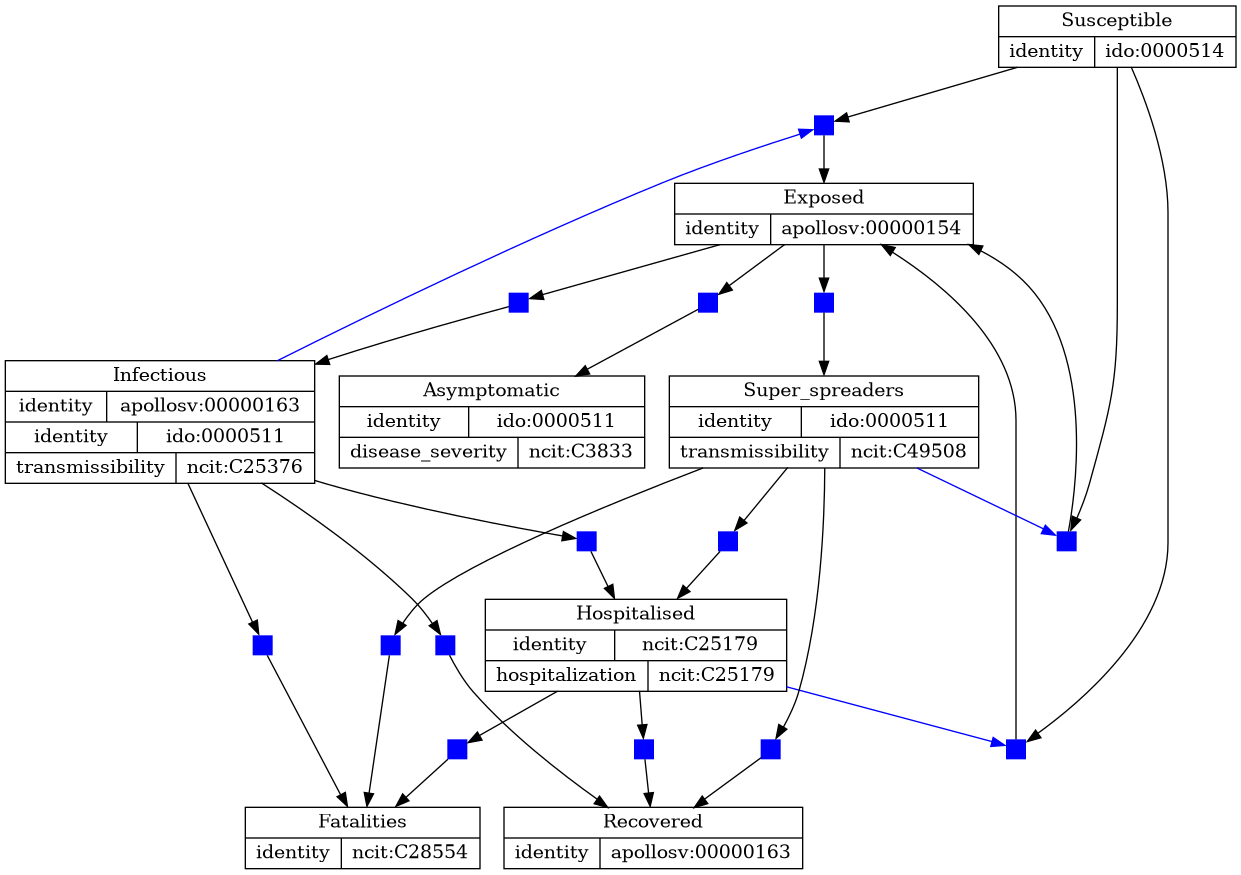

In [11]:
MODEL_NAME = "biomd958"
import mira
from mira.modeling.viz import GraphicalModel
mira.modeling.viz.GraphicalModel.for_jupyter(model.G.template_model, name=f"viz_{MODEL_NAME}.png")

In [12]:
import matplotlib.pyplot as plt

def plot_sample(times, s, names, alpha=1, **kwargs):
    for i,name in enumerate(names):
        for trajectory in s[name]:
            plt.plot(times, trajectory, label=name, alpha=alpha, color='C' + str(i), **kwargs)

In [13]:
import torch
model.pseudocount = torch.tensor(1000.0)

In [14]:
import random
import pyro
pyro.set_rng_seed(3)
random.seed(0)
times = np.linspace(0.01, 30, 100)
num_samples = 100
data = sample(model, times, num_samples)

In [15]:
data

{'mira_param_0': tensor([5.8816e-05, 6.2915e-05, 6.1354e-05, 6.5005e-05, 6.9037e-05, 6.2150e-05,
         5.9408e-05, 6.5357e-05, 5.7505e-05, 6.9209e-05, 6.3542e-05, 6.9255e-05,
         6.3995e-05, 5.9311e-05, 6.7510e-05, 6.4551e-05, 6.8105e-05, 6.2241e-05,
         6.0004e-05, 6.9129e-05, 6.1243e-05, 5.8525e-05, 6.0875e-05, 6.3192e-05,
         6.7862e-05, 6.9997e-05, 6.4939e-05, 6.1664e-05, 6.2320e-05, 6.6867e-05,
         5.7398e-05, 6.1853e-05, 5.9745e-05, 5.8712e-05, 6.1568e-05, 6.9238e-05,
         5.8397e-05, 6.4392e-05, 6.1907e-05, 6.7797e-05, 6.1956e-05, 6.3950e-05,
         6.6372e-05, 6.4198e-05, 5.9976e-05, 5.7675e-05, 5.8247e-05, 5.8090e-05,
         6.5591e-05, 6.6356e-05, 6.4676e-05, 5.7894e-05, 6.2561e-05, 6.6783e-05,
         5.7999e-05, 6.4252e-05, 6.5136e-05, 6.1244e-05, 5.8464e-05, 6.3985e-05,
         5.8055e-05, 6.1379e-05, 6.4355e-05, 6.6107e-05, 6.0097e-05, 6.6182e-05,
         6.6317e-05, 6.2247e-05, 5.7916e-05, 6.0122e-05, 6.4975e-05, 6.5281e-05,
         5.7

In [16]:
data.keys()

dict_keys(['mira_param_0', 'mira_param_1', 'mira_param_2', 'mira_param_3', 'mira_param_4', 'mira_param_5', 'mira_param_6', 'mira_param_7', 'mira_param_8', 'mira_param_9', 'mira_param_10', 'mira_param_11', 'mira_param_12', 'mira_param_13', 'Asymptomatic_sol', 'Exposed_sol', 'Fatalities_sol', 'Hospitalised_sol', 'Infectious_sol', 'Recovered_sol', 'Super_spreaders_sol', 'Susceptible_sol'])

In [20]:
import pyro
mu = data['Infectious_sol'][0][observed_indices]
obs_times = times[observed_indices]
obs_vals = pyro.distributions.Beta(mu * model.pseudocount, (1 - mu) * model.pseudocount).sample()

NameError: name 'observed_indices' is not defined

In [19]:
plot_sample(times, data, ('I_sol',), alpha=0.3, zorder=1)
plt.scatter(obs_times, obs_vals, color='C1', zorder=2, s=10)

KeyError: 'I_sol'

In [12]:
obs = [(times[j], 
        {var: float(data[var + "_sol"][0,j]) for var in ["S", "I", "R"]})
    for j in observed_indices]

In [13]:
len(obs)

10

In [22]:
post = calibrate(model, obs, verbose=True, num_iterations=300)
post

iteration 0: loss = 291.3385531902313
iteration 25: loss = -92.37012076377869
iteration 50: loss = -119.22490632534027
iteration 75: loss = -117.86052203178406
iteration 100: loss = -113.73650884628296
iteration 125: loss = -116.79984641075134
iteration 150: loss = -118.32231855392456
iteration 175: loss = -117.6040608882904
iteration 200: loss = -117.36278343200684
iteration 225: loss = -117.13619816303253
iteration 250: loss = -117.95557451248169
iteration 275: loss = -117.52828669548035


AutoLowRankMultivariateNormal()

In [23]:
post_sample = sample(model, np.linspace(0.01, 30, 100), 100, inferred_parameters=post)

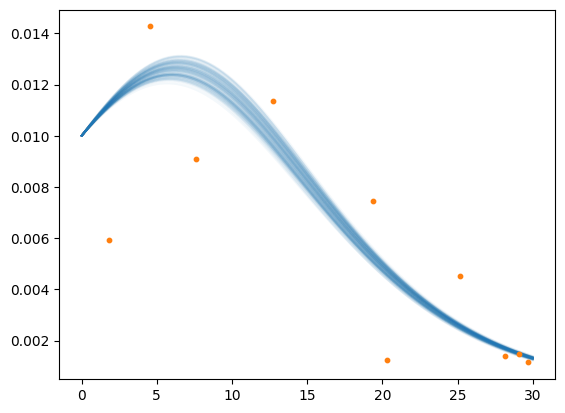

In [28]:
plot_sample(times, post_sample, ('I_sol',), alpha=0.05, zorder=1)
plt.scatter(times[observed_indices], obs_vals, color='C1', zorder=2, s=10)

Text(0, 0.5, 'a_gamma')

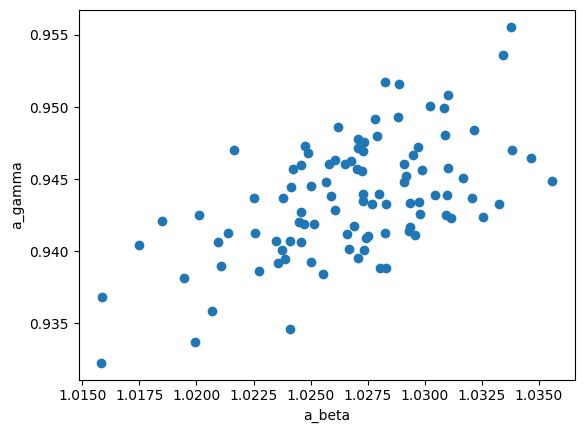

In [25]:
plt.scatter(post_sample["a_beta"], post_sample["a_gamma"])
plt.xlabel("a_beta")
plt.ylabel("a_gamma")